In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#(a)
data_time  = pd.read_csv("Airline.csv",parse_dates=[['Month', 'Year']],
                         index_col = "Month_Year" ) 

print(data_time.describe())

plt.figure()
plt.plot(data_time)

data = pd.read_csv("Airline.csv") 
passenger = data["Passengers"]

       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [2]:
def linearOptimization(X, m):
     # define X: 1~t
    x = np.linspace(1, len(X), len(X))
    x = np.reshape(x, (len(x), 1))
    y = np.reshape(X, (len(X), 1))
     # train a linear regression to get l0 (intercept_) and b0 (coef_[0])
    lm = LinearRegression().fit(x, y)
    l0 = lm.intercept_
    b0 = lm.coef_[0]
     # use trained linear regression model to get y^t
     # then s^ = y-y^
     # finally average s^ to get s
     # The following statement is equal to:
     #    res = y - lm.predict(x)+0.
     #    res = np.reshape(res,(m,int(len(X)/m)))
     #    s = np.mean(res,axis=0)
    #s = np.mean(np.reshape(y + 0. - lm.predict(x),(int(len(X)/m),m)), axis=0)
     # in the above statement, 0. is used to transfer an int to float
     # check the datatype of l0, b, and s
    return l0[0],b0[0]
    # return l0[0],b0, s.tolist()

In [3]:
from sklearn.linear_model import LinearRegression
 
a = [linearOptimization(passenger.values,12)[0]]
b = [linearOptimization(passenger.values,12)[1]]

In [4]:
print(a)
print(b)
#print(passenger[:12].mean())
#print((sum(passenger[12:24])-sum(passenger[:12]))/144)


[87.65277777777771]
[2.6571839080459774]


In [5]:
def holt(y, alpha, beta):
    
    l = [linearOptimization(passenger.values,12)[0]]
    b = [linearOptimization(passenger.values,12)[1]]
    #l = [y[0]]

    #b = [y[1] - y[0]]

    holtsmoothed = []
    
    
    Y = y.tolist()
    
    for i in range(len(Y)): 
        if i == len(Y) - 1:
            Y.append(l[-1] + b[-1])
            
        l.append(alpha * Y[i+1] + (1 - alpha) * (l[i] + b[i]))
        b.append(beta * (l[i+1] - l[i]) + (1 - beta) * b[i])
        holtsmoothed.append(l[i+1] + b[i+1])
    
    return holtsmoothed

holtsmoothed = holt(passenger,0.2,0.2)

In [6]:
def sse(x,y):
    return np.sum(np.power(x-y,2))

alphas = [ 0.2, 0.4, 0.6, 0.8]
betas = [0.2, 0.4, 0.6, 0.8]
sse_one = []
count = 0

In [7]:
for alpha in alphas:
    for beta in betas:
        smoothed = holt(passenger,alpha,beta)
        SSE2 = sse(smoothed[:-1], passenger.values[1:])
        
        print("No",count, " Alpha =", alpha, " beta =", beta, " see =",SSE2)
        sse_one.append(SSE2)
        count+=1

No 0  Alpha = 0.2  beta = 0.2  see = 239330.5295907872
No 1  Alpha = 0.2  beta = 0.4  see = 302494.18296958925
No 2  Alpha = 0.2  beta = 0.6  see = 402574.81458731164
No 3  Alpha = 0.2  beta = 0.8  see = 551940.797699722
No 4  Alpha = 0.4  beta = 0.2  see = 120848.67164375704
No 5  Alpha = 0.4  beta = 0.4  see = 151849.13247932945
No 6  Alpha = 0.4  beta = 0.6  see = 178254.0314186313
No 7  Alpha = 0.4  beta = 0.8  see = 188360.22203726007
No 8  Alpha = 0.6  beta = 0.2  see = 41823.364473004796
No 9  Alpha = 0.6  beta = 0.4  see = 59553.74504578943
No 10  Alpha = 0.6  beta = 0.6  see = 82978.5786279386
No 11  Alpha = 0.6  beta = 0.8  see = 105427.90870487192
No 12  Alpha = 0.8  beta = 0.2  see = 14076.67499319565
No 13  Alpha = 0.8  beta = 0.4  see = 37419.474375495825
No 14  Alpha = 0.8  beta = 0.6  see = 66962.4753691173
No 15  Alpha = 0.8  beta = 0.8  see = 96837.5237433988


In [8]:
print("The index of least sse: ",np.argmin(sse_one))

The index of least sse:  12


Text(0, 0.5, 'Num of passengers')

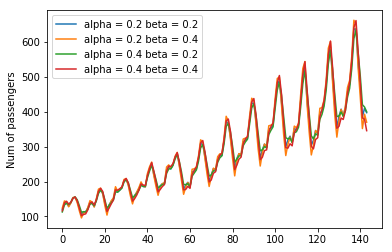

In [9]:
smoothed1 = holt(passenger,alphas[3],betas[0]) # alpha = 0.8 beta = 0.2
smoothed2 = holt(passenger,alphas[3],betas[1]) # alpha = 0.8 beta = 0.4
smoothed3 = holt(passenger,alphas[2],betas[0]) # alpha = 0.6 beta = 0.2
smoothed4 = holt(passenger,alphas[2],betas[1]) # alpha = 0.6 beta = 0.4

plt.figure()
plt.plot(smoothed1,label = "alpha = 0.2 beta = 0.2" )
plt.plot(smoothed2,label = "alpha = 0.2 beta = 0.4" )
plt.plot(smoothed3,label = "alpha = 0.4 beta = 0.2" )
plt.plot(smoothed4,label = "alpha = 0.4 beta = 0.4" )
plt.title("")
plt.legend()
plt.ylabel("Num of passengers")

In [10]:
sse_two = []
alphas2 = np.arange(0.01,1,0.01)
betas2 = np.arange(0.01,1,0.01)
count = 0

In [11]:
def holt_2(y, alpha, beta):
    
    l = [linearOptimization(passenger.values,12)[0]]
    #l = [y[0]] 
    b = [linearOptimization(passenger.values,12)[1]]
    #b = [y[1] - y[0]]
    holtsmoothed = []
    
    Y = y.tolist()
    
    for i in range(len(Y)+4):
        if i == len(Y) - 1:
            Y.append(l[-1] + 2*b[-1])
            
        l.append(alpha * Y[i+1] + (1 - alpha) * (l[i] + b[i]))
        b.append(beta * (l[i+1] - l[i]) + (1 - beta) * b[i])
        holtsmoothed.append(l[i+1] + 2*b[i+1])
    
    return holtsmoothed

In [12]:
for alpha in alphas2:
    for beta in betas2:
        smoothed2 = holt_2(passenger,alpha,beta)
        SSE2 = sse(smoothed2[2:-4], passenger.values[2:])
        print("No ",count, "Alpha =", alpha, " beta =", beta, " see =",SSE2 )
        sse_two.append(SSE2)
        count += 1
        

No  0 Alpha = 0.01  beta = 0.01  see = 299684.52668860334
No  1 Alpha = 0.01  beta = 0.02  see = 301503.05705627776
No  2 Alpha = 0.01  beta = 0.03  see = 303161.49060772295
No  3 Alpha = 0.01  beta = 0.04  see = 304695.7312950471
No  4 Alpha = 0.01  beta = 0.05  see = 306133.94054343743
No  5 Alpha = 0.01  beta = 0.060000000000000005  see = 307486.47928865574
No  6 Alpha = 0.01  beta = 0.06999999999999999  see = 308746.5135292087
No  7 Alpha = 0.01  beta = 0.08  see = 309895.6178479904
No  8 Alpha = 0.01  beta = 0.09  see = 310910.8575132121
No  9 Alpha = 0.01  beta = 0.09999999999999999  see = 311771.32719540905
No  10 Alpha = 0.01  beta = 0.11  see = 312463.1384285554
No  11 Alpha = 0.01  beta = 0.12  see = 312982.50734319177
No  12 Alpha = 0.01  beta = 0.13  see = 313336.99807477905
No  13 Alpha = 0.01  beta = 0.14  see = 313545.2012597582
No  14 Alpha = 0.01  beta = 0.15000000000000002  see = 313635.2282082535
No  15 Alpha = 0.01  beta = 0.16  see = 313642.4220688292
No  16 Alpha 

No  196 Alpha = 0.02  beta = 0.98  see = 358706.73598338035
No  197 Alpha = 0.02  beta = 0.99  see = 359577.52874386235
No  198 Alpha = 0.03  beta = 0.01  see = 280534.838145696
No  199 Alpha = 0.03  beta = 0.02  see = 281424.2417335599
No  200 Alpha = 0.03  beta = 0.03  see = 281920.56746847444
No  201 Alpha = 0.03  beta = 0.04  see = 282167.2671080672
No  202 Alpha = 0.03  beta = 0.05  see = 282334.5566804934
No  203 Alpha = 0.03  beta = 0.060000000000000005  see = 282605.0193135027
No  204 Alpha = 0.03  beta = 0.06999999999999999  see = 283123.399307547
No  205 Alpha = 0.03  beta = 0.08  see = 283958.48290201486
No  206 Alpha = 0.03  beta = 0.09  see = 285095.83585328516
No  207 Alpha = 0.03  beta = 0.09999999999999999  see = 286456.89931870654
No  208 Alpha = 0.03  beta = 0.11  see = 287930.55993047415
No  209 Alpha = 0.03  beta = 0.12  see = 289403.9820412971
No  210 Alpha = 0.03  beta = 0.13  see = 290784.61163920694
No  211 Alpha = 0.03  beta = 0.14  see = 292010.80339227297
No 

No  375 Alpha = 0.04  beta = 0.79  see = 291655.83430423046
No  376 Alpha = 0.04  beta = 0.8  see = 291563.8722094238
No  377 Alpha = 0.04  beta = 0.81  see = 291509.0526152879
No  378 Alpha = 0.04  beta = 0.8200000000000001  see = 291488.22542365844
No  379 Alpha = 0.04  beta = 0.8300000000000001  see = 291498.07131090004
No  380 Alpha = 0.04  beta = 0.8400000000000001  see = 291535.18936934375
No  381 Alpha = 0.04  beta = 0.85  see = 291596.18222386047
No  382 Alpha = 0.04  beta = 0.86  see = 291677.73807213956
No  383 Alpha = 0.04  beta = 0.87  see = 291776.7086787001
No  384 Alpha = 0.04  beta = 0.88  see = 291890.1820066307
No  385 Alpha = 0.04  beta = 0.89  see = 292015.5479447866
No  386 Alpha = 0.04  beta = 0.9  see = 292150.5555098692
No  387 Alpha = 0.04  beta = 0.91  see = 292293.3599805975
No  388 Alpha = 0.04  beta = 0.92  see = 292442.55864601326
No  389 Alpha = 0.04  beta = 0.93  see = 292597.214197915
No  390 Alpha = 0.04  beta = 0.9400000000000001  see = 292756.8652347

No  541 Alpha = 0.060000000000000005  beta = 0.47000000000000003  see = 267207.4052622646
No  542 Alpha = 0.060000000000000005  beta = 0.48000000000000004  see = 267040.4681279366
No  543 Alpha = 0.060000000000000005  beta = 0.49  see = 266898.8911233671
No  544 Alpha = 0.060000000000000005  beta = 0.5  see = 266786.47165106155
No  545 Alpha = 0.060000000000000005  beta = 0.51  see = 266705.6256087031
No  546 Alpha = 0.060000000000000005  beta = 0.52  see = 266657.53767643706
No  547 Alpha = 0.060000000000000005  beta = 0.53  see = 266642.3449956369
No  548 Alpha = 0.060000000000000005  beta = 0.54  see = 266659.33993162075
No  549 Alpha = 0.060000000000000005  beta = 0.55  see = 266707.18002025585
No  550 Alpha = 0.060000000000000005  beta = 0.56  see = 266784.0953335182
No  551 Alpha = 0.060000000000000005  beta = 0.5700000000000001  see = 266888.08524362947
No  552 Alpha = 0.060000000000000005  beta = 0.5800000000000001  see = 267017.09796994104
No  553 Alpha = 0.060000000000000005 

No  732 Alpha = 0.08  beta = 0.4  see = 244510.8457400589
No  733 Alpha = 0.08  beta = 0.41000000000000003  see = 244579.45422947648
No  734 Alpha = 0.08  beta = 0.42000000000000004  see = 244671.1123661796
No  735 Alpha = 0.08  beta = 0.43  see = 244786.1166938513
No  736 Alpha = 0.08  beta = 0.44  see = 244924.41834290305
No  737 Alpha = 0.08  beta = 0.45  see = 245085.80583017447
No  738 Alpha = 0.08  beta = 0.46  see = 245270.05469871504
No  739 Alpha = 0.08  beta = 0.47000000000000003  see = 245477.03797665378
No  740 Alpha = 0.08  beta = 0.48000000000000004  see = 245706.7957663743
No  741 Alpha = 0.08  beta = 0.49  see = 245959.56599871843
No  742 Alpha = 0.08  beta = 0.5  see = 246235.78132900115
No  743 Alpha = 0.08  beta = 0.51  see = 246536.03918941045
No  744 Alpha = 0.08  beta = 0.52  see = 246861.05309892714
No  745 Alpha = 0.08  beta = 0.53  see = 247211.59350890468
No  746 Alpha = 0.08  beta = 0.54  see = 247588.425854981
No  747 Alpha = 0.08  beta = 0.55  see = 247992.

No  915 Alpha = 0.09999999999999999  beta = 0.25  see = 223660.3518312645
No  916 Alpha = 0.09999999999999999  beta = 0.26  see = 223706.79369279693
No  917 Alpha = 0.09999999999999999  beta = 0.27  see = 223737.9166837843
No  918 Alpha = 0.09999999999999999  beta = 0.28  see = 223759.7164037422
No  919 Alpha = 0.09999999999999999  beta = 0.29000000000000004  see = 223778.13800408595
No  920 Alpha = 0.09999999999999999  beta = 0.3  see = 223798.68890759314
No  921 Alpha = 0.09999999999999999  beta = 0.31  see = 223826.19172255762
No  922 Alpha = 0.09999999999999999  beta = 0.32  see = 223864.6713325234
No  923 Alpha = 0.09999999999999999  beta = 0.33  see = 223917.35378251373
No  924 Alpha = 0.09999999999999999  beta = 0.34  see = 223986.74611653748
No  925 Alpha = 0.09999999999999999  beta = 0.35000000000000003  see = 224074.76456101233
No  926 Alpha = 0.09999999999999999  beta = 0.36000000000000004  see = 224182.8815299912
No  927 Alpha = 0.09999999999999999  beta = 0.37  see = 22431

No  1107 Alpha = 0.12  beta = 0.19  see = 204501.85931403885
No  1108 Alpha = 0.12  beta = 0.2  see = 204514.45361966296
No  1109 Alpha = 0.12  beta = 0.21000000000000002  see = 204511.29235840595
No  1110 Alpha = 0.12  beta = 0.22  see = 204494.5553238389
No  1111 Alpha = 0.12  beta = 0.23  see = 204467.69226239104
No  1112 Alpha = 0.12  beta = 0.24000000000000002  see = 204434.9210555043
No  1113 Alpha = 0.12  beta = 0.25  see = 204400.7664279302
No  1114 Alpha = 0.12  beta = 0.26  see = 204369.6936974599
No  1115 Alpha = 0.12  beta = 0.27  see = 204345.86099142165
No  1116 Alpha = 0.12  beta = 0.28  see = 204332.98717741555
No  1117 Alpha = 0.12  beta = 0.29000000000000004  see = 204334.31527484147
No  1118 Alpha = 0.12  beta = 0.3  see = 204352.6428563678
No  1119 Alpha = 0.12  beta = 0.31  see = 204390.39031282938
No  1120 Alpha = 0.12  beta = 0.32  see = 204449.68231017166
No  1121 Alpha = 0.12  beta = 0.33  see = 204532.42474591514
No  1122 Alpha = 0.12  beta = 0.34  see = 20464

No  1305 Alpha = 0.14  beta = 0.19  see = 186427.24019995265
No  1306 Alpha = 0.14  beta = 0.2  see = 186283.90080943535
No  1307 Alpha = 0.14  beta = 0.21000000000000002  see = 186138.6062092673
No  1308 Alpha = 0.14  beta = 0.22  see = 185994.93740310246
No  1309 Alpha = 0.14  beta = 0.23  see = 185856.76845280165
No  1310 Alpha = 0.14  beta = 0.24000000000000002  see = 185727.99809844687
No  1311 Alpha = 0.14  beta = 0.25  see = 185612.37768169935
No  1312 Alpha = 0.14  beta = 0.26  see = 185513.42337019916
No  1313 Alpha = 0.14  beta = 0.27  see = 185434.39081042135
No  1314 Alpha = 0.14  beta = 0.28  see = 185378.28849034655
No  1315 Alpha = 0.14  beta = 0.29000000000000004  see = 185347.90948178808
No  1316 Alpha = 0.14  beta = 0.3  see = 185345.8670353718
No  1317 Alpha = 0.14  beta = 0.31  see = 185374.62554137706
No  1318 Alpha = 0.14  beta = 0.32  see = 185436.52333447535
No  1319 Alpha = 0.14  beta = 0.33  see = 185533.78718849985
No  1320 Alpha = 0.14  beta = 0.34  see = 18

No  1508 Alpha = 0.16  beta = 0.24000000000000002  see = 167426.75230251023
No  1509 Alpha = 0.16  beta = 0.25  see = 167231.5069855735
No  1510 Alpha = 0.16  beta = 0.26  see = 167065.84750918805
No  1511 Alpha = 0.16  beta = 0.27  see = 166933.18048768022
No  1512 Alpha = 0.16  beta = 0.28  see = 166836.76621731097
No  1513 Alpha = 0.16  beta = 0.29000000000000004  see = 166779.7275662695
No  1514 Alpha = 0.16  beta = 0.3  see = 166765.05767553783
No  1515 Alpha = 0.16  beta = 0.31  see = 166795.62570287543
No  1516 Alpha = 0.16  beta = 0.32  see = 166874.1811828804
No  1517 Alpha = 0.16  beta = 0.33  see = 167003.35812643246
No  1518 Alpha = 0.16  beta = 0.34  see = 167185.6800489744
No  1519 Alpha = 0.16  beta = 0.35000000000000003  see = 167423.5669303287
No  1520 Alpha = 0.16  beta = 0.36000000000000004  see = 167719.34480991366
No  1521 Alpha = 0.16  beta = 0.37  see = 168075.25838189086
No  1522 Alpha = 0.16  beta = 0.38  see = 168493.48660885994
No  1523 Alpha = 0.16  beta = 0

No  1697 Alpha = 0.18000000000000002  beta = 0.15000000000000002  see = 153356.65085381837
No  1698 Alpha = 0.18000000000000002  beta = 0.16  see = 152879.05884683417
No  1699 Alpha = 0.18000000000000002  beta = 0.17  see = 152410.76281910483
No  1700 Alpha = 0.18000000000000002  beta = 0.18000000000000002  see = 151954.4446834484
No  1701 Alpha = 0.18000000000000002  beta = 0.19  see = 151513.54083366098
No  1702 Alpha = 0.18000000000000002  beta = 0.2  see = 151091.96523028688
No  1703 Alpha = 0.18000000000000002  beta = 0.21000000000000002  see = 150693.88747724658
No  1704 Alpha = 0.18000000000000002  beta = 0.22  see = 150323.5730014043
No  1705 Alpha = 0.18000000000000002  beta = 0.23  see = 149985.27829449825
No  1706 Alpha = 0.18000000000000002  beta = 0.24000000000000002  see = 149683.18812086293
No  1707 Alpha = 0.18000000000000002  beta = 0.25  see = 149421.38116779173
No  1708 Alpha = 0.18000000000000002  beta = 0.26  see = 149203.81315542574
No  1709 Alpha = 0.180000000000

No  1894 Alpha = 0.2  beta = 0.14  see = 138110.28624206712
No  1895 Alpha = 0.2  beta = 0.15000000000000002  see = 137449.60081786072
No  1896 Alpha = 0.2  beta = 0.16  see = 136806.01794511793
No  1897 Alpha = 0.2  beta = 0.17  see = 136182.53150519583
No  1898 Alpha = 0.2  beta = 0.18000000000000002  see = 135582.913461294
No  1899 Alpha = 0.2  beta = 0.19  see = 135011.45841667085
No  1900 Alpha = 0.2  beta = 0.2  see = 134472.77141523134
No  1901 Alpha = 0.2  beta = 0.21000000000000002  see = 133971.60803869463
No  1902 Alpha = 0.2  beta = 0.22  see = 133512.76280979277
No  1903 Alpha = 0.2  beta = 0.23  see = 133100.9962500072
No  1904 Alpha = 0.2  beta = 0.24000000000000002  see = 132740.99017853118
No  1905 Alpha = 0.2  beta = 0.25  see = 132437.3225692322
No  1906 Alpha = 0.2  beta = 0.26  see = 132194.45576618554
No  1907 Alpha = 0.2  beta = 0.27  see = 132016.73411649748
No  1908 Alpha = 0.2  beta = 0.28  see = 131908.38872177445
No  1909 Alpha = 0.2  beta = 0.29000000000000

No  2090 Alpha = 0.22  beta = 0.12  see = 124901.71463316356
No  2091 Alpha = 0.22  beta = 0.13  see = 124035.63452896336
No  2092 Alpha = 0.22  beta = 0.14  see = 123192.61932618129
No  2093 Alpha = 0.22  beta = 0.15000000000000002  see = 122374.89172264376
No  2094 Alpha = 0.22  beta = 0.16  see = 121585.7442650787
No  2095 Alpha = 0.22  beta = 0.17  see = 120829.30492561593
No  2096 Alpha = 0.22  beta = 0.18000000000000002  see = 120110.29501757522
No  2097 Alpha = 0.22  beta = 0.19  see = 119433.81708476113
No  2098 Alpha = 0.22  beta = 0.2  see = 118805.18757398173
No  2099 Alpha = 0.22  beta = 0.21000000000000002  see = 118229.81485937476
No  2100 Alpha = 0.22  beta = 0.22  see = 117713.11626231436
No  2101 Alpha = 0.22  beta = 0.23  see = 117260.46572898598
No  2102 Alpha = 0.22  beta = 0.24000000000000002  see = 116877.1644954105
No  2103 Alpha = 0.22  beta = 0.25  see = 116568.42872295849
No  2104 Alpha = 0.22  beta = 0.26  see = 116339.3897688973
No  2105 Alpha = 0.22  beta =

No  2278 Alpha = 0.24000000000000002  beta = 0.02  see = 123034.83214226103
No  2279 Alpha = 0.24000000000000002  beta = 0.03  see = 121738.74440491149
No  2280 Alpha = 0.24000000000000002  beta = 0.04  see = 120480.03481085127
No  2281 Alpha = 0.24000000000000002  beta = 0.05  see = 119239.53002947637
No  2282 Alpha = 0.24000000000000002  beta = 0.060000000000000005  see = 118017.3298961144
No  2283 Alpha = 0.24000000000000002  beta = 0.06999999999999999  see = 116818.9044617717
No  2284 Alpha = 0.24000000000000002  beta = 0.08  see = 115648.537570834
No  2285 Alpha = 0.24000000000000002  beta = 0.09  see = 114508.06836005946
No  2286 Alpha = 0.24000000000000002  beta = 0.09999999999999999  see = 113397.72668090521
No  2287 Alpha = 0.24000000000000002  beta = 0.11  see = 112317.33055721693
No  2288 Alpha = 0.24000000000000002  beta = 0.12  see = 111267.20083343185
No  2289 Alpha = 0.24000000000000002  beta = 0.13  see = 110248.6640698253
No  2290 Alpha = 0.24000000000000002  beta = 0.

No  2482 Alpha = 0.26  beta = 0.08  see = 103683.23004742147
No  2483 Alpha = 0.26  beta = 0.09  see = 102383.22919721063
No  2484 Alpha = 0.26  beta = 0.09999999999999999  see = 101121.18094024181
No  2485 Alpha = 0.26  beta = 0.11  see = 99898.20139669252
No  2486 Alpha = 0.26  beta = 0.12  see = 98716.0739342684
No  2487 Alpha = 0.26  beta = 0.13  see = 97577.60354101357
No  2488 Alpha = 0.26  beta = 0.14  see = 96486.6800135397
No  2489 Alpha = 0.26  beta = 0.15000000000000002  see = 95448.16589396846
No  2490 Alpha = 0.26  beta = 0.16  see = 94467.70575863218
No  2491 Alpha = 0.26  beta = 0.17  see = 93551.52191526744
No  2492 Alpha = 0.26  beta = 0.18000000000000002  see = 92706.23269283412
No  2493 Alpha = 0.26  beta = 0.19  see = 91938.70851275616
No  2494 Alpha = 0.26  beta = 0.2  see = 91255.96813079892
No  2495 Alpha = 0.26  beta = 0.21000000000000002  see = 90665.11101832651
No  2496 Alpha = 0.26  beta = 0.22  see = 90173.2795252116
No  2497 Alpha = 0.26  beta = 0.23  see =

No  2672 Alpha = 0.27  beta = 0.99  see = 986401.6371287163
No  2673 Alpha = 0.28  beta = 0.01  see = 103965.15415120791
No  2674 Alpha = 0.28  beta = 0.02  see = 102213.95041976105
No  2675 Alpha = 0.28  beta = 0.03  see = 100547.38538142
No  2676 Alpha = 0.28  beta = 0.04  see = 98926.62386407994
No  2677 Alpha = 0.28  beta = 0.05  see = 97337.24881829177
No  2678 Alpha = 0.28  beta = 0.060000000000000005  see = 95780.71203401583
No  2679 Alpha = 0.28  beta = 0.06999999999999999  see = 94262.4976091256
No  2680 Alpha = 0.28  beta = 0.08  see = 92787.20830869026
No  2681 Alpha = 0.28  beta = 0.09  see = 91357.91385860351
No  2682 Alpha = 0.28  beta = 0.09999999999999999  see = 89976.94654838479
No  2683 Alpha = 0.28  beta = 0.11  see = 88646.80263159468
No  2684 Alpha = 0.28  beta = 0.12  see = 87370.73056891153
No  2685 Alpha = 0.28  beta = 0.13  see = 86152.97967035799
No  2686 Alpha = 0.28  beta = 0.14  see = 84998.8053451222
No  2687 Alpha = 0.28  beta = 0.15000000000000002  see =

No  2865 Alpha = 0.29000000000000004  beta = 0.9400000000000001  see = 911732.9142426129
No  2866 Alpha = 0.29000000000000004  beta = 0.9500000000000001  see = 927948.552027092
No  2867 Alpha = 0.29000000000000004  beta = 0.9600000000000001  see = 943630.8041133311
No  2868 Alpha = 0.29000000000000004  beta = 0.97  see = 958765.7244189506
No  2869 Alpha = 0.29000000000000004  beta = 0.98  see = 973342.2504778886
No  2870 Alpha = 0.29000000000000004  beta = 0.99  see = 987352.1333341098
No  2871 Alpha = 0.3  beta = 0.01  see = 95135.99297577144
No  2872 Alpha = 0.3  beta = 0.02  see = 93230.37548858198
No  2873 Alpha = 0.3  beta = 0.03  see = 91413.41515349252
No  2874 Alpha = 0.3  beta = 0.04  see = 89649.1523352084
No  2875 Alpha = 0.3  beta = 0.05  see = 87925.11509457648
No  2876 Alpha = 0.3  beta = 0.060000000000000005  see = 86243.52150903648
No  2877 Alpha = 0.3  beta = 0.06999999999999999  see = 84610.29255269592
No  2878 Alpha = 0.3  beta = 0.08  see = 83030.67946177551
No  287

No  3059 Alpha = 0.31  beta = 0.9  see = 856127.1857181515
No  3060 Alpha = 0.31  beta = 0.91  see = 871248.3045979611
No  3061 Alpha = 0.31  beta = 0.92  see = 885869.6611013304
No  3062 Alpha = 0.31  beta = 0.93  see = 899981.4820522261
No  3063 Alpha = 0.31  beta = 0.9400000000000001  see = 913576.6144897448
No  3064 Alpha = 0.31  beta = 0.9500000000000001  see = 926650.4275909938
No  3065 Alpha = 0.31  beta = 0.9600000000000001  see = 939200.697411904
No  3066 Alpha = 0.31  beta = 0.97  see = 951227.4773808355
No  3067 Alpha = 0.31  beta = 0.98  see = 962732.9574408694
No  3068 Alpha = 0.31  beta = 0.99  see = 973721.3146392344
No  3069 Alpha = 0.32  beta = 0.01  see = 87265.21089365144
No  3070 Alpha = 0.32  beta = 0.02  see = 85231.98185454647
No  3071 Alpha = 0.32  beta = 0.03  see = 83293.51849646341
No  3072 Alpha = 0.32  beta = 0.04  see = 81416.56807148764
No  3073 Alpha = 0.32  beta = 0.05  see = 79590.46624922502
No  3074 Alpha = 0.32  beta = 0.060000000000000005  see = 77

No  3252 Alpha = 0.33  beta = 0.85  see = 788176.8239411364
No  3253 Alpha = 0.33  beta = 0.86  see = 803129.1059808973
No  3254 Alpha = 0.33  beta = 0.87  see = 817630.264925574
No  3255 Alpha = 0.33  beta = 0.88  see = 831669.9837842071
No  3256 Alpha = 0.33  beta = 0.89  see = 845240.4499722943
No  3257 Alpha = 0.33  beta = 0.9  see = 858336.2653292516
No  3258 Alpha = 0.33  beta = 0.91  see = 870954.3394316906
No  3259 Alpha = 0.33  beta = 0.92  see = 883093.7690252351
No  3260 Alpha = 0.33  beta = 0.93  see = 894755.706359002
No  3261 Alpha = 0.33  beta = 0.9400000000000001  see = 905943.2191120468
No  3262 Alpha = 0.33  beta = 0.9500000000000001  see = 916661.1444597567
No  3263 Alpha = 0.33  beta = 0.9600000000000001  see = 926915.9396500528
No  3264 Alpha = 0.33  beta = 0.97  see = 936715.5312540124
No  3265 Alpha = 0.33  beta = 0.98  see = 946069.1650319267
No  3266 Alpha = 0.33  beta = 0.99  see = 954987.2581222283
No  3267 Alpha = 0.34  beta = 0.01  see = 80357.45869414137
N

No  3447 Alpha = 0.35000000000000003  beta = 0.8200000000000001  see = 752917.485071534
No  3448 Alpha = 0.35000000000000003  beta = 0.8300000000000001  see = 767130.326687408
No  3449 Alpha = 0.35000000000000003  beta = 0.8400000000000001  see = 780920.4906183883
No  3450 Alpha = 0.35000000000000003  beta = 0.85  see = 794280.6236835023
No  3451 Alpha = 0.35000000000000003  beta = 0.86  see = 807205.651184889
No  3452 Alpha = 0.35000000000000003  beta = 0.87  see = 819692.6718984214
No  3453 Alpha = 0.35000000000000003  beta = 0.88  see = 831740.8406485878
No  3454 Alpha = 0.35000000000000003  beta = 0.89  see = 843351.241117145
No  3455 Alpha = 0.35000000000000003  beta = 0.9  see = 854526.7514232649
No  3456 Alpha = 0.35000000000000003  beta = 0.91  see = 865271.9048603745
No  3457 Alpha = 0.35000000000000003  beta = 0.92  see = 875592.7479910954
No  3458 Alpha = 0.35000000000000003  beta = 0.93  see = 885496.6980955794
No  3459 Alpha = 0.35000000000000003  beta = 0.9400000000000001

No  3641 Alpha = 0.37  beta = 0.78  see = 705109.8700164023
No  3642 Alpha = 0.37  beta = 0.79  see = 719259.156457765
No  3643 Alpha = 0.37  beta = 0.8  see = 733024.199227797
No  3644 Alpha = 0.37  beta = 0.81  see = 746397.047928083
No  3645 Alpha = 0.37  beta = 0.8200000000000001  see = 759371.9531047681
No  3646 Alpha = 0.37  beta = 0.8300000000000001  see = 771945.2692092279
No  3647 Alpha = 0.37  beta = 0.8400000000000001  see = 784115.3452376248
No  3648 Alpha = 0.37  beta = 0.85  see = 795882.4056114275
No  3649 Alpha = 0.37  beta = 0.86  see = 807248.4237558394
No  3650 Alpha = 0.37  beta = 0.87  see = 818216.9906880829
No  3651 Alpha = 0.37  beta = 0.88  see = 828793.1807517901
No  3652 Alpha = 0.37  beta = 0.89  see = 838983.4164361663
No  3653 Alpha = 0.37  beta = 0.9  see = 848795.3340072845
No  3654 Alpha = 0.37  beta = 0.91  see = 858237.6514609345
No  3655 Alpha = 0.37  beta = 0.92  see = 867320.0400883944
No  3656 Alpha = 0.37  beta = 0.93  see = 876053.0007333562
No 

No  3836 Alpha = 0.39  beta = 0.75  see = 673378.6369319926
No  3837 Alpha = 0.39  beta = 0.76  see = 687264.1019266193
No  3838 Alpha = 0.39  beta = 0.77  see = 700794.8387028185
No  3839 Alpha = 0.39  beta = 0.78  see = 713963.6730026298
No  3840 Alpha = 0.39  beta = 0.79  see = 726765.5099716901
No  3841 Alpha = 0.39  beta = 0.8  see = 739197.236869664
No  3842 Alpha = 0.39  beta = 0.81  see = 751257.6150167045
No  3843 Alpha = 0.39  beta = 0.8200000000000001  see = 762947.1634038368
No  3844 Alpha = 0.39  beta = 0.8300000000000001  see = 774268.0362721973
No  3845 Alpha = 0.39  beta = 0.8400000000000001  see = 785223.8968093054
No  3846 Alpha = 0.39  beta = 0.85  see = 795819.7889287393
No  3847 Alpha = 0.39  beta = 0.86  see = 806062.0089008736
No  3848 Alpha = 0.39  beta = 0.87  see = 815957.9783942812
No  3849 Alpha = 0.39  beta = 0.88  see = 825516.1202763069
No  3850 Alpha = 0.39  beta = 0.89  see = 834745.7383129873
No  3851 Alpha = 0.39  beta = 0.9  see = 843656.901707215
No

No  4031 Alpha = 0.41000000000000003  beta = 0.72  see = 642967.7376260662
No  4032 Alpha = 0.41000000000000003  beta = 0.73  see = 656742.8972883036
No  4033 Alpha = 0.41000000000000003  beta = 0.74  see = 670192.748609939
No  4034 Alpha = 0.41000000000000003  beta = 0.75  see = 683310.1691911325
No  4035 Alpha = 0.41000000000000003  beta = 0.76  see = 696090.0353301142
No  4036 Alpha = 0.41000000000000003  beta = 0.77  see = 708529.128633905
No  4037 Alpha = 0.41000000000000003  beta = 0.78  see = 720626.032467372
No  4038 Alpha = 0.41000000000000003  beta = 0.79  see = 732381.0205715206
No  4039 Alpha = 0.41000000000000003  beta = 0.8  see = 743795.9400566936
No  4040 Alpha = 0.41000000000000003  beta = 0.81  see = 754874.0908198715
No  4041 Alpha = 0.41000000000000003  beta = 0.8200000000000001  see = 765620.103256051
No  4042 Alpha = 0.41000000000000003  beta = 0.8300000000000001  see = 776039.8159394402
No  4043 Alpha = 0.41000000000000003  beta = 0.8400000000000001  see = 786140

No  4183 Alpha = 0.43  beta = 0.26  see = 71955.56019616955
No  4184 Alpha = 0.43  beta = 0.27  see = 76770.63034511034
No  4185 Alpha = 0.43  beta = 0.28  see = 82053.90735482948
No  4186 Alpha = 0.43  beta = 0.29000000000000004  see = 87816.63917441499
No  4187 Alpha = 0.43  beta = 0.3  see = 94068.83883194643
No  4188 Alpha = 0.43  beta = 0.31  see = 100819.12615290881
No  4189 Alpha = 0.43  beta = 0.32  see = 108074.56901872228
No  4190 Alpha = 0.43  beta = 0.33  see = 115840.52690519365
No  4191 Alpha = 0.43  beta = 0.34  see = 124120.49964164721
No  4192 Alpha = 0.43  beta = 0.35000000000000003  see = 132915.98448171248
No  4193 Alpha = 0.43  beta = 0.36000000000000004  see = 142226.34466920717
No  4194 Alpha = 0.43  beta = 0.37  see = 152048.69270880282
No  4195 Alpha = 0.43  beta = 0.38  see = 162377.79150251567
No  4196 Alpha = 0.43  beta = 0.39  see = 173205.97638169597
No  4197 Alpha = 0.43  beta = 0.4  see = 184523.10084413394
No  4198 Alpha = 0.43  beta = 0.410000000000000

No  4332 Alpha = 0.44  beta = 0.76  see = 707245.4253565026
No  4333 Alpha = 0.44  beta = 0.77  see = 718522.9375577972
No  4334 Alpha = 0.44  beta = 0.78  see = 729505.9505002756
No  4335 Alpha = 0.44  beta = 0.79  see = 740199.7184403652
No  4336 Alpha = 0.44  beta = 0.8  see = 750610.5362656043
No  4337 Alpha = 0.44  beta = 0.81  see = 760745.6290187241
No  4338 Alpha = 0.44  beta = 0.8200000000000001  see = 770613.0449758887
No  4339 Alpha = 0.44  beta = 0.8300000000000001  see = 780221.553079308
No  4340 Alpha = 0.44  beta = 0.8400000000000001  see = 789580.5453540554
No  4341 Alpha = 0.44  beta = 0.85  see = 798699.9447816282
No  4342 Alpha = 0.44  beta = 0.86  see = 807590.1189600916
No  4343 Alpha = 0.44  beta = 0.87  see = 816261.799753109
No  4344 Alpha = 0.44  beta = 0.88  see = 824726.0090182276
No  4345 Alpha = 0.44  beta = 0.89  see = 832993.9904080533
No  4346 Alpha = 0.44  beta = 0.9  see = 841077.1471559702
No  4347 Alpha = 0.44  beta = 0.91  see = 848986.985690008
No 

No  4508 Alpha = 0.46  beta = 0.54  see = 414014.08031513984
No  4509 Alpha = 0.46  beta = 0.55  see = 429494.9146078031
No  4510 Alpha = 0.46  beta = 0.56  see = 444939.0526592262
No  4511 Alpha = 0.46  beta = 0.5700000000000001  see = 460317.5731605361
No  4512 Alpha = 0.46  beta = 0.5800000000000001  see = 475603.024203703
No  4513 Alpha = 0.46  beta = 0.59  see = 490769.58158931846
No  4514 Alpha = 0.46  beta = 0.6  see = 505793.18158892845
No  4515 Alpha = 0.46  beta = 0.61  see = 520651.6276588007
No  4516 Alpha = 0.46  beta = 0.62  see = 535324.6711603986
No  4517 Alpha = 0.46  beta = 0.63  see = 549794.066653984
No  4518 Alpha = 0.46  beta = 0.64  see = 564043.602784092
No  4519 Alpha = 0.46  beta = 0.65  see = 578059.1101610846
No  4520 Alpha = 0.46  beta = 0.66  see = 591828.4479568235
No  4521 Alpha = 0.46  beta = 0.67  see = 605341.4711732278
No  4522 Alpha = 0.46  beta = 0.68  see = 618589.9807113024
No  4523 Alpha = 0.46  beta = 0.6900000000000001  see = 631567.6584688656

No  4704 Alpha = 0.48000000000000004  beta = 0.52  see = 402345.6996224515
No  4705 Alpha = 0.48000000000000004  beta = 0.53  see = 417559.32035862346
No  4706 Alpha = 0.48000000000000004  beta = 0.54  see = 432748.28984454623
No  4707 Alpha = 0.48000000000000004  beta = 0.55  see = 447884.6728189266
No  4708 Alpha = 0.48000000000000004  beta = 0.56  see = 462941.9818213101
No  4709 Alpha = 0.48000000000000004  beta = 0.5700000000000001  see = 477895.3272834332
No  4710 Alpha = 0.48000000000000004  beta = 0.5800000000000001  see = 492721.54254725017
No  4711 Alpha = 0.48000000000000004  beta = 0.59  see = 507399.28345421265
No  4712 Alpha = 0.48000000000000004  beta = 0.6  see = 521909.10268572776
No  4713 Alpha = 0.48000000000000004  beta = 0.61  see = 536233.4995200825
No  4714 Alpha = 0.48000000000000004  beta = 0.62  see = 550356.9460962045
No  4715 Alpha = 0.48000000000000004  beta = 0.63  see = 564265.8916325432
No  4716 Alpha = 0.48000000000000004  beta = 0.64  see = 577948.7463

No  4883 Alpha = 0.5  beta = 0.33  see = 163287.40406234772
No  4884 Alpha = 0.5  beta = 0.34  see = 173947.42943369353
No  4885 Alpha = 0.5  beta = 0.35000000000000003  see = 185060.73215189888
No  4886 Alpha = 0.5  beta = 0.36000000000000004  see = 196610.67030025925
No  4887 Alpha = 0.5  beta = 0.37  see = 208578.35624156948
No  4888 Alpha = 0.5  beta = 0.38  see = 220942.7659070203
No  4889 Alpha = 0.5  beta = 0.39  see = 233680.87695983012
No  4890 Alpha = 0.5  beta = 0.4  see = 246767.83422636008
No  4891 Alpha = 0.5  beta = 0.41000000000000003  see = 260177.1401261395
No  4892 Alpha = 0.5  beta = 0.42000000000000004  see = 273880.8672228712
No  4893 Alpha = 0.5  beta = 0.43  see = 287849.8894836381
No  4894 Alpha = 0.5  beta = 0.44  see = 302054.1283931065
No  4895 Alpha = 0.5  beta = 0.45  see = 316462.809739527
No  4896 Alpha = 0.5  beta = 0.46  see = 331044.72668112774
No  4897 Alpha = 0.5  beta = 0.47000000000000003  see = 345768.50462107296
No  4898 Alpha = 0.5  beta = 0.48

No  5040 Alpha = 0.51  beta = 0.91  see = 877072.995476714
No  5041 Alpha = 0.51  beta = 0.92  see = 885794.7426496522
No  5042 Alpha = 0.51  beta = 0.93  see = 894491.3895994194
No  5043 Alpha = 0.51  beta = 0.9400000000000001  see = 903171.8894663883
No  5044 Alpha = 0.51  beta = 0.9500000000000001  see = 911844.963935846
No  5045 Alpha = 0.51  beta = 0.9600000000000001  see = 920519.0904819439
No  5046 Alpha = 0.51  beta = 0.97  see = 929202.491205803
No  5047 Alpha = 0.51  beta = 0.98  see = 937903.1230842106
No  5048 Alpha = 0.51  beta = 0.99  see = 946628.669460801
No  5049 Alpha = 0.52  beta = 0.01  see = 57548.741894345905
No  5050 Alpha = 0.52  beta = 0.02  see = 55894.39959761188
No  5051 Alpha = 0.52  beta = 0.03  see = 54482.175192399896
No  5052 Alpha = 0.52  beta = 0.04  see = 53299.57678702798
No  5053 Alpha = 0.52  beta = 0.05  see = 52349.93942065103
No  5054 Alpha = 0.52  beta = 0.060000000000000005  see = 51645.949851183614
No  5055 Alpha = 0.52  beta = 0.06999999999

No  5233 Alpha = 0.53  beta = 0.86  see = 844932.7232125358
No  5234 Alpha = 0.53  beta = 0.87  see = 854224.943163647
No  5235 Alpha = 0.53  beta = 0.88  see = 863471.5846030724
No  5236 Alpha = 0.53  beta = 0.89  see = 872681.7296885282
No  5237 Alpha = 0.53  beta = 0.9  see = 881864.2733262767
No  5238 Alpha = 0.53  beta = 0.91  see = 891027.9031520458
No  5239 Alpha = 0.53  beta = 0.92  see = 900181.0817639148
No  5240 Alpha = 0.53  beta = 0.93  see = 909332.0309922416
No  5241 Alpha = 0.53  beta = 0.9400000000000001  see = 918488.7180050788
No  5242 Alpha = 0.53  beta = 0.9500000000000001  see = 927658.8430617382
No  5243 Alpha = 0.53  beta = 0.9600000000000001  see = 936849.8287417138
No  5244 Alpha = 0.53  beta = 0.97  see = 946068.8104908626
No  5245 Alpha = 0.53  beta = 0.98  see = 955322.6283413013
No  5246 Alpha = 0.53  beta = 0.99  see = 964617.8196756698
No  5247 Alpha = 0.54  beta = 0.01  see = 58649.45745790756
No  5248 Alpha = 0.54  beta = 0.02  see = 57169.71975637093


No  5429 Alpha = 0.55  beta = 0.8400000000000001  see = 839536.1172614095
No  5430 Alpha = 0.55  beta = 0.85  see = 849243.6525160726
No  5431 Alpha = 0.55  beta = 0.86  see = 858910.6846829999
No  5432 Alpha = 0.55  beta = 0.87  see = 868545.8147516793
No  5433 Alpha = 0.55  beta = 0.88  see = 878157.4524359567
No  5434 Alpha = 0.55  beta = 0.89  see = 887753.7948906552
No  5435 Alpha = 0.55  beta = 0.9  see = 897342.8077470985
No  5436 Alpha = 0.55  beta = 0.91  see = 906932.2082634886
No  5437 Alpha = 0.55  beta = 0.92  see = 916529.4503984918
No  5438 Alpha = 0.55  beta = 0.93  see = 926141.7116295784
No  5439 Alpha = 0.55  beta = 0.9400000000000001  see = 935775.8813513413
No  5440 Alpha = 0.55  beta = 0.9500000000000001  see = 945438.5507029014
No  5441 Alpha = 0.55  beta = 0.9600000000000001  see = 955136.0036873217
No  5442 Alpha = 0.55  beta = 0.97  see = 964874.2094595331
No  5443 Alpha = 0.55  beta = 0.98  see = 974658.8156724225
No  5444 Alpha = 0.55  beta = 0.99  see = 984

No  5622 Alpha = 0.5700000000000001  beta = 0.79  see = 803603.5351412771
No  5623 Alpha = 0.5700000000000001  beta = 0.8  see = 813863.4830335479
No  5624 Alpha = 0.5700000000000001  beta = 0.81  see = 824060.5936273123
No  5625 Alpha = 0.5700000000000001  beta = 0.8200000000000001  see = 834203.3983698897
No  5626 Alpha = 0.5700000000000001  beta = 0.8300000000000001  see = 844300.3206920943
No  5627 Alpha = 0.5700000000000001  beta = 0.8400000000000001  see = 854359.6449207738
No  5628 Alpha = 0.5700000000000001  beta = 0.85  see = 864389.4882527422
No  5629 Alpha = 0.5700000000000001  beta = 0.86  see = 874397.7755721081
No  5630 Alpha = 0.5700000000000001  beta = 0.87  see = 884392.2168982667
No  5631 Alpha = 0.5700000000000001  beta = 0.88  see = 894380.2872597058
No  5632 Alpha = 0.5700000000000001  beta = 0.89  see = 904369.208798459
No  5633 Alpha = 0.5700000000000001  beta = 0.9  see = 914365.9349212225
No  5634 Alpha = 0.5700000000000001  beta = 0.91  see = 924377.1363252571

No  5773 Alpha = 0.59  beta = 0.32  see = 217847.60644327546
No  5774 Alpha = 0.59  beta = 0.33  see = 229871.86910561597
No  5775 Alpha = 0.59  beta = 0.34  see = 242235.20955497772
No  5776 Alpha = 0.59  beta = 0.35000000000000003  see = 254912.71398607185
No  5777 Alpha = 0.59  beta = 0.36000000000000004  see = 267878.3637669895
No  5778 Alpha = 0.59  beta = 0.37  see = 281105.26609738974
No  5779 Alpha = 0.59  beta = 0.38  see = 294565.8931150296
No  5780 Alpha = 0.59  beta = 0.39  see = 308232.32529021474
No  5781 Alpha = 0.59  beta = 0.4  see = 322076.4949384997
No  5782 Alpha = 0.59  beta = 0.41000000000000003  see = 336070.4257918473
No  5783 Alpha = 0.59  beta = 0.42000000000000004  see = 350186.4647891575
No  5784 Alpha = 0.59  beta = 0.43  see = 364397.5025660579
No  5785 Alpha = 0.59  beta = 0.44  see = 378677.17952503776
No  5786 Alpha = 0.59  beta = 0.45  see = 393000.07483197784
No  5787 Alpha = 0.59  beta = 0.46  see = 407341.87619395327
No  5788 Alpha = 0.59  beta = 0.

No  5969 Alpha = 0.61  beta = 0.3  see = 208765.0813228725
No  5970 Alpha = 0.61  beta = 0.31  see = 220358.53912826473
No  5971 Alpha = 0.61  beta = 0.32  see = 232311.27134217718
No  5972 Alpha = 0.61  beta = 0.33  see = 244599.8591251532
No  5973 Alpha = 0.61  beta = 0.34  see = 257199.6364761769
No  5974 Alpha = 0.61  beta = 0.35000000000000003  see = 270084.90922313294
No  5975 Alpha = 0.61  beta = 0.36000000000000004  see = 283229.185009827
No  5976 Alpha = 0.61  beta = 0.37  see = 296605.4102452339
No  5977 Alpha = 0.61  beta = 0.38  see = 310186.20989458926
No  5978 Alpha = 0.61  beta = 0.39  see = 323944.12602643756
No  5979 Alpha = 0.61  beta = 0.4  see = 337851.8511794816
No  5980 Alpha = 0.61  beta = 0.41000000000000003  see = 351882.4528680652
No  5981 Alpha = 0.61  beta = 0.42000000000000004  see = 366009.5858914403
No  5982 Alpha = 0.61  beta = 0.43  see = 380207.6895327163
No  5983 Alpha = 0.61  beta = 0.44  see = 394452.16720958956
No  5984 Alpha = 0.61  beta = 0.45  s

No  6165 Alpha = 0.63  beta = 0.28  see = 199966.02616462493
No  6166 Alpha = 0.63  beta = 0.29000000000000004  see = 211101.47309297163
No  6167 Alpha = 0.63  beta = 0.3  see = 222616.45089382114
No  6168 Alpha = 0.63  beta = 0.31  see = 234489.20529943868
No  6169 Alpha = 0.63  beta = 0.32  see = 246696.58679521797
No  6170 Alpha = 0.63  beta = 0.33  see = 259214.2552767124
No  6171 Alpha = 0.63  beta = 0.34  see = 272016.8984282182
No  6172 Alpha = 0.63  beta = 0.35000000000000003  see = 285078.45997927577
No  6173 Alpha = 0.63  beta = 0.36000000000000004  see = 298372.3738234948
No  6174 Alpha = 0.63  beta = 0.37  see = 311871.7999320816
No  6175 Alpha = 0.63  beta = 0.38  see = 325549.8580606768
No  6176 Alpha = 0.63  beta = 0.39  see = 339379.8554258806
No  6177 Alpha = 0.63  beta = 0.4  see = 353335.5048060168
No  6178 Alpha = 0.63  beta = 0.41000000000000003  see = 367391.1298844625
No  6179 Alpha = 0.63  beta = 0.42000000000000004  see = 381521.85508582206
No  6180 Alpha = 0.6

No  6360 Alpha = 0.65  beta = 0.25  see = 181290.67316931317
No  6361 Alpha = 0.65  beta = 0.26  see = 191521.9143431158
No  6362 Alpha = 0.65  beta = 0.27  see = 202170.6457383972
No  6363 Alpha = 0.65  beta = 0.28  see = 213218.6699004437
No  6364 Alpha = 0.65  beta = 0.29000000000000004  see = 224646.07907496972
No  6365 Alpha = 0.65  beta = 0.3  see = 236431.42280528334
No  6366 Alpha = 0.65  beta = 0.31  see = 248551.89523126217
No  6367 Alpha = 0.65  beta = 0.32  see = 260983.53888792807
No  6368 Alpha = 0.65  beta = 0.33  see = 273701.4614307947
No  6369 Alpha = 0.65  beta = 0.34  see = 286680.06145222276
No  6370 Alpha = 0.65  beta = 0.35000000000000003  see = 299893.25940604723
No  6371 Alpha = 0.65  beta = 0.36000000000000004  see = 313314.72962940217
No  6372 Alpha = 0.65  beta = 0.37  see = 326918.1295383009
No  6373 Alpha = 0.65  beta = 0.38  see = 340677.3222695069
No  6374 Alpha = 0.65  beta = 0.39  see = 354566.5893336683
No  6375 Alpha = 0.65  beta = 0.4  see = 368560.

No  6542 Alpha = 0.67  beta = 0.09  see = 87697.62878152743
No  6543 Alpha = 0.67  beta = 0.09999999999999999  see = 90780.96229931815
No  6544 Alpha = 0.67  beta = 0.11  see = 94311.39175932985
No  6545 Alpha = 0.67  beta = 0.12  see = 98299.39194192599
No  6546 Alpha = 0.67  beta = 0.13  see = 102754.14908761231
No  6547 Alpha = 0.67  beta = 0.14  see = 107683.4219744464
No  6548 Alpha = 0.67  beta = 0.15000000000000002  see = 113093.39494542012
No  6549 Alpha = 0.67  beta = 0.16  see = 118988.53612012963
No  6550 Alpha = 0.67  beta = 0.17  see = 125371.4690386552
No  6551 Alpha = 0.67  beta = 0.18000000000000002  see = 132242.8626394876
No  6552 Alpha = 0.67  beta = 0.19  see = 139601.34257893567
No  6553 Alpha = 0.67  beta = 0.2  see = 147443.42592661676
No  6554 Alpha = 0.67  beta = 0.21000000000000002  see = 155763.48076742433
No  6555 Alpha = 0.67  beta = 0.22  see = 164553.71190847462
No  6556 Alpha = 0.67  beta = 0.23  see = 173804.17356687217
No  6557 Alpha = 0.67  beta = 0.2

No  6717 Alpha = 0.68  beta = 0.85  see = 962424.6028864308
No  6718 Alpha = 0.68  beta = 0.86  see = 974081.5278343416
No  6719 Alpha = 0.68  beta = 0.87  see = 985755.3047116629
No  6720 Alpha = 0.68  beta = 0.88  see = 997448.3120061004
No  6721 Alpha = 0.68  beta = 0.89  see = 1009162.6315232113
No  6722 Alpha = 0.68  beta = 0.9  see = 1020900.0505142767
No  6723 Alpha = 0.68  beta = 0.91  see = 1032662.0652062463
No  6724 Alpha = 0.68  beta = 0.92  see = 1044449.885637572
No  6725 Alpha = 0.68  beta = 0.93  see = 1056264.4417077051
No  6726 Alpha = 0.68  beta = 0.9400000000000001  see = 1068106.390351423
No  6727 Alpha = 0.68  beta = 0.9500000000000001  see = 1079976.1237518974
No  6728 Alpha = 0.68  beta = 0.9600000000000001  see = 1091873.7785086625
No  6729 Alpha = 0.68  beta = 0.97  see = 1103799.245678352
No  6730 Alpha = 0.68  beta = 0.98  see = 1115752.1816073407
No  6731 Alpha = 0.68  beta = 0.99  see = 1127732.0194763115
No  6732 Alpha = 0.6900000000000001  beta = 0.01  s

No  6903 Alpha = 0.7000000000000001  beta = 0.73  see = 838941.4493144162
No  6904 Alpha = 0.7000000000000001  beta = 0.74  see = 850869.6372952268
No  6905 Alpha = 0.7000000000000001  beta = 0.75  see = 862770.9744924251
No  6906 Alpha = 0.7000000000000001  beta = 0.76  see = 874650.2596465745
No  6907 Alpha = 0.7000000000000001  beta = 0.77  see = 886512.1006723146
No  6908 Alpha = 0.7000000000000001  beta = 0.78  see = 898360.8948078064
No  6909 Alpha = 0.7000000000000001  beta = 0.79  see = 910200.8116238058
No  6910 Alpha = 0.7000000000000001  beta = 0.8  see = 922035.7787309771
No  6911 Alpha = 0.7000000000000001  beta = 0.81  see = 933869.4700273956
No  6912 Alpha = 0.7000000000000001  beta = 0.8200000000000001  see = 945705.2963326244
No  6913 Alpha = 0.7000000000000001  beta = 0.8300000000000001  see = 957546.3982598933
No  6914 Alpha = 0.7000000000000001  beta = 0.8400000000000001  see = 969395.6411835203
No  6915 Alpha = 0.7000000000000001  beta = 0.85  see = 981255.61216445

No  7097 Alpha = 0.72  beta = 0.6900000000000001  see = 806735.6986694017
No  7098 Alpha = 0.72  beta = 0.7000000000000001  see = 818975.4534453807
No  7099 Alpha = 0.72  beta = 0.7100000000000001  see = 831174.614552588
No  7100 Alpha = 0.72  beta = 0.72  see = 843337.9716249339
No  7101 Alpha = 0.72  beta = 0.73  see = 855470.2057307069
No  7102 Alpha = 0.72  beta = 0.74  see = 867575.8612124694
No  7103 Alpha = 0.72  beta = 0.75  see = 879659.3208788355
No  7104 Alpha = 0.72  beta = 0.76  see = 891724.7843882611
No  7105 Alpha = 0.72  beta = 0.77  see = 903776.2496613243
No  7106 Alpha = 0.72  beta = 0.78  see = 915817.4971567574
No  7107 Alpha = 0.72  beta = 0.79  see = 927852.0768473095
No  7108 Alpha = 0.72  beta = 0.8  see = 939883.2977337779
No  7109 Alpha = 0.72  beta = 0.81  see = 951914.2197389612
No  7110 Alpha = 0.72  beta = 0.8200000000000001  see = 963947.6478274639
No  7111 Alpha = 0.72  beta = 0.8300000000000001  see = 975986.1282019404
No  7112 Alpha = 0.72  beta = 0.

No  7294 Alpha = 0.74  beta = 0.68  see = 810320.4618080722
No  7295 Alpha = 0.74  beta = 0.6900000000000001  see = 822750.7584886395
No  7296 Alpha = 0.74  beta = 0.7000000000000001  see = 835141.4687359164
No  7297 Alpha = 0.74  beta = 0.7100000000000001  see = 847496.9946528093
No  7298 Alpha = 0.74  beta = 0.72  see = 859821.6374908993
No  7299 Alpha = 0.74  beta = 0.73  see = 872119.5705599552
No  7300 Alpha = 0.74  beta = 0.74  see = 884394.8154878735
No  7301 Alpha = 0.74  beta = 0.75  see = 896651.2216703596
No  7302 Alpha = 0.74  beta = 0.76  see = 908892.4487449289
No  7303 Alpha = 0.74  beta = 0.77  see = 921121.9519215687
No  7304 Alpha = 0.74  beta = 0.78  see = 933342.9700022007
No  7305 Alpha = 0.74  beta = 0.79  see = 945558.5159224353
No  7306 Alpha = 0.74  beta = 0.8  see = 957771.3696516706
No  7307 Alpha = 0.74  beta = 0.81  see = 969984.0732909967
No  7308 Alpha = 0.74  beta = 0.8200000000000001  see = 982198.9282123956
No  7309 Alpha = 0.74  beta = 0.8300000000000

No  7486 Alpha = 0.76  beta = 0.62  see = 749884.7504493718
No  7487 Alpha = 0.76  beta = 0.63  see = 762753.3999583186
No  7488 Alpha = 0.76  beta = 0.64  see = 775562.6504291925
No  7489 Alpha = 0.76  beta = 0.65  see = 788316.4901131658
No  7490 Alpha = 0.76  beta = 0.66  see = 801019.0033618823
No  7491 Alpha = 0.76  beta = 0.67  see = 813674.3257201515
No  7492 Alpha = 0.76  beta = 0.68  see = 826286.6029511672
No  7493 Alpha = 0.76  beta = 0.6900000000000001  see = 838859.9539213048
No  7494 Alpha = 0.76  beta = 0.7000000000000001  see = 851398.4372433694
No  7495 Alpha = 0.76  beta = 0.7100000000000001  see = 863906.0215548789
No  7496 Alpha = 0.76  beta = 0.72  see = 876386.5592908197
No  7497 Alpha = 0.76  beta = 0.73  see = 888843.7637975938
No  7498 Alpha = 0.76  beta = 0.74  see = 901281.18962592
No  7499 Alpha = 0.76  beta = 0.75  see = 913702.2158346733
No  7500 Alpha = 0.76  beta = 0.76  see = 926110.0321344433
No  7501 Alpha = 0.76  beta = 0.77  see = 938507.6276985252


No  7678 Alpha = 0.78  beta = 0.56  see = 685981.5686781654
No  7679 Alpha = 0.78  beta = 0.5700000000000001  see = 699351.2875133327
No  7680 Alpha = 0.78  beta = 0.5800000000000001  see = 712649.0293350723
No  7681 Alpha = 0.78  beta = 0.59  see = 725877.0950678695
No  7682 Alpha = 0.78  beta = 0.6  see = 739038.1705752071
No  7683 Alpha = 0.78  beta = 0.61  see = 752135.263478654
No  7684 Alpha = 0.78  beta = 0.62  see = 765171.6435227733
No  7685 Alpha = 0.78  beta = 0.63  see = 778150.7866790951
No  7686 Alpha = 0.78  beta = 0.64  see = 791076.3231129334
No  7687 Alpha = 0.78  beta = 0.65  see = 803951.989076494
No  7688 Alpha = 0.78  beta = 0.66  see = 816781.5827399945
No  7689 Alpha = 0.78  beta = 0.67  see = 829568.92392891
No  7690 Alpha = 0.78  beta = 0.68  see = 842317.8176991814
No  7691 Alpha = 0.78  beta = 0.6900000000000001  see = 855032.0216526466
No  7692 Alpha = 0.78  beta = 0.7000000000000001  see = 867715.2168712904
No  7693 Alpha = 0.78  beta = 0.7100000000000001 

No  7871 Alpha = 0.8  beta = 0.51  see = 632454.2516459265
No  7872 Alpha = 0.8  beta = 0.52  see = 646253.6155131871
No  7873 Alpha = 0.8  beta = 0.53  see = 659982.4318947573
No  7874 Alpha = 0.8  beta = 0.54  see = 673640.3559083042
No  7875 Alpha = 0.8  beta = 0.55  see = 687227.7138969041
No  7876 Alpha = 0.8  beta = 0.56  see = 700745.4310876784
No  7877 Alpha = 0.8  beta = 0.5700000000000001  see = 714194.960986593
No  7878 Alpha = 0.8  beta = 0.5800000000000001  see = 727578.2170917583
No  7879 Alpha = 0.8  beta = 0.59  see = 740897.507400743
No  7880 Alpha = 0.8  beta = 0.6  see = 754155.4720889085
No  7881 Alpha = 0.8  beta = 0.61  see = 767355.0246461899
No  7882 Alpha = 0.8  beta = 0.62  see = 780499.2966794545
No  7883 Alpha = 0.8  beta = 0.63  see = 793591.58651654
No  7884 Alpha = 0.8  beta = 0.64  see = 806635.3116860772
No  7885 Alpha = 0.8  beta = 0.65  see = 819633.9652938168
No  7886 Alpha = 0.8  beta = 0.66  see = 832591.0762708689
No  7887 Alpha = 0.8  beta = 0.67

No  8049 Alpha = 0.8200000000000001  beta = 0.31  see = 364065.1319187388
No  8050 Alpha = 0.8200000000000001  beta = 0.32  see = 377745.13167353836
No  8051 Alpha = 0.8200000000000001  beta = 0.33  see = 391574.4392807654
No  8052 Alpha = 0.8200000000000001  beta = 0.34  see = 405531.72046143806
No  8053 Alpha = 0.8200000000000001  beta = 0.35000000000000003  see = 419596.46506279794
No  8054 Alpha = 0.8200000000000001  beta = 0.36000000000000004  see = 433749.1066226815
No  8055 Alpha = 0.8200000000000001  beta = 0.37  see = 447971.1235293485
No  8056 Alpha = 0.8200000000000001  beta = 0.38  see = 462245.1215101372
No  8057 Alpha = 0.8200000000000001  beta = 0.39  see = 476554.89757973776
No  8058 Alpha = 0.8200000000000001  beta = 0.4  see = 490885.4859341802
No  8059 Alpha = 0.8200000000000001  beta = 0.41000000000000003  see = 505223.1865835117
No  8060 Alpha = 0.8200000000000001  beta = 0.42000000000000004  see = 519555.5777708772
No  8061 Alpha = 0.8200000000000001  beta = 0.43 

No  8245 Alpha = 0.8400000000000001  beta = 0.29000000000000004  see = 350079.6353812204
No  8246 Alpha = 0.8400000000000001  beta = 0.3  see = 363525.0696175717
No  8247 Alpha = 0.8400000000000001  beta = 0.31  see = 377153.47078641056
No  8248 Alpha = 0.8400000000000001  beta = 0.32  see = 390942.8568614082
No  8249 Alpha = 0.8400000000000001  beta = 0.33  see = 404871.86711750535
No  8250 Alpha = 0.8400000000000001  beta = 0.34  see = 418919.90308373346
No  8251 Alpha = 0.8400000000000001  beta = 0.35000000000000003  see = 433067.2523478875
No  8252 Alpha = 0.8400000000000001  beta = 0.36000000000000004  see = 447295.1943884495
No  8253 Alpha = 0.8400000000000001  beta = 0.37  see = 461586.08804244746
No  8254 Alpha = 0.8400000000000001  beta = 0.38  see = 475923.4406215875
No  8255 Alpha = 0.8400000000000001  beta = 0.39  see = 490291.9590533751
No  8256 Alpha = 0.8400000000000001  beta = 0.4  see = 504677.5837420231
No  8257 Alpha = 0.8400000000000001  beta = 0.41000000000000003  

No  8435 Alpha = 0.86  beta = 0.21000000000000002  see = 263156.1060844721
No  8436 Alpha = 0.86  beta = 0.22  see = 274543.1972148904
No  8437 Alpha = 0.86  beta = 0.23  see = 286279.4902558143
No  8438 Alpha = 0.86  beta = 0.24000000000000002  see = 298344.22382423916
No  8439 Alpha = 0.86  beta = 0.25  see = 310715.88203393156
No  8440 Alpha = 0.86  beta = 0.26  see = 323372.3926977356
No  8441 Alpha = 0.86  beta = 0.27  see = 336291.3270807598
No  8442 Alpha = 0.86  beta = 0.28  see = 349450.0977070654
No  8443 Alpha = 0.86  beta = 0.29000000000000004  see = 362826.15091860894
No  8444 Alpha = 0.86  beta = 0.3  see = 376397.15116078354
No  8445 Alpha = 0.86  beta = 0.31  see = 390141.15431115404
No  8446 Alpha = 0.86  beta = 0.32  see = 404036.7677616908
No  8447 Alpha = 0.86  beta = 0.33  see = 418063.2953934175
No  8448 Alpha = 0.86  beta = 0.34  see = 432200.86602907896
No  8449 Alpha = 0.86  beta = 0.35000000000000003  see = 446430.54439799103
No  8450 Alpha = 0.86  beta = 0.36

No  8623 Alpha = 0.88  beta = 0.11  see = 180996.91338869696
No  8624 Alpha = 0.88  beta = 0.12  see = 188310.00122864774
No  8625 Alpha = 0.88  beta = 0.13  see = 196100.12632114207
No  8626 Alpha = 0.88  beta = 0.14  see = 204361.1633900447
No  8627 Alpha = 0.88  beta = 0.15000000000000002  see = 213085.07689163214
No  8628 Alpha = 0.88  beta = 0.16  see = 222261.9556593641
No  8629 Alpha = 0.88  beta = 0.17  see = 231880.0703135741
No  8630 Alpha = 0.88  beta = 0.18000000000000002  see = 241925.95482829912
No  8631 Alpha = 0.88  beta = 0.19  see = 252384.51182081146
No  8632 Alpha = 0.88  beta = 0.2  see = 263239.1399478358
No  8633 Alpha = 0.88  beta = 0.21000000000000002  see = 274471.8810244321
No  8634 Alpha = 0.88  beta = 0.22  see = 286063.5839693204
No  8635 Alpha = 0.88  beta = 0.23  see = 297994.0823348897
No  8636 Alpha = 0.88  beta = 0.24000000000000002  see = 310242.38195791753
No  8637 Alpha = 0.88  beta = 0.25  see = 322786.85515017464
No  8638 Alpha = 0.88  beta = 0.2

No  8821 Alpha = 0.9  beta = 0.11  see = 189878.25338378974
No  8822 Alpha = 0.9  beta = 0.12  see = 197455.9469747941
No  8823 Alpha = 0.9  beta = 0.13  see = 205507.59031420882
No  8824 Alpha = 0.9  beta = 0.14  see = 214026.07117494228
No  8825 Alpha = 0.9  beta = 0.15000000000000002  see = 223002.40076630196
No  8826 Alpha = 0.9  beta = 0.16  see = 232425.76231147544
No  8827 Alpha = 0.9  beta = 0.17  see = 242283.58182823367
No  8828 Alpha = 0.9  beta = 0.18000000000000002  see = 252561.6221438995
No  8829 Alpha = 0.9  beta = 0.19  see = 263244.0993971335
No  8830 Alpha = 0.9  beta = 0.2  see = 274313.8201394875
No  8831 Alpha = 0.9  beta = 0.21000000000000002  see = 285752.3364249171
No  8832 Alpha = 0.9  beta = 0.22  see = 297540.1158116763
No  8833 Alpha = 0.9  beta = 0.23  see = 309656.7229099071
No  8834 Alpha = 0.9  beta = 0.24000000000000002  see = 322081.00894524605
No  8835 Alpha = 0.9  beta = 0.25  see = 334791.3057535139
No  8836 Alpha = 0.9  beta = 0.26  see = 347765.6

No  9009 Alpha = 0.92  beta = 0.01  see = 146809.81536706508
No  9010 Alpha = 0.92  beta = 0.02  see = 149866.9496683735
No  9011 Alpha = 0.92  beta = 0.03  see = 153403.76867102386
No  9012 Alpha = 0.92  beta = 0.04  see = 157410.6902161838
No  9013 Alpha = 0.92  beta = 0.05  see = 161886.99985573176
No  9014 Alpha = 0.92  beta = 0.060000000000000005  see = 166836.87541000577
No  9015 Alpha = 0.92  beta = 0.06999999999999999  see = 172265.11892690652
No  9016 Alpha = 0.92  beta = 0.08  see = 178175.2599693475
No  9017 Alpha = 0.92  beta = 0.09  see = 184568.95785584638
No  9018 Alpha = 0.92  beta = 0.09999999999999999  see = 191445.88521210357
No  9019 Alpha = 0.92  beta = 0.11  see = 198803.74174060996
No  9020 Alpha = 0.92  beta = 0.12  see = 206638.28620137455
No  9021 Alpha = 0.92  beta = 0.13  see = 214943.3654939396
No  9022 Alpha = 0.92  beta = 0.14  see = 223710.94626379863
No  9023 Alpha = 0.92  beta = 0.15000000000000002  see = 232931.1581775978
No  9024 Alpha = 0.92  beta =

No  9203 Alpha = 0.93  beta = 0.9600000000000001  see = 1357679.109177209
No  9204 Alpha = 0.93  beta = 0.97  see = 1372216.422742814
No  9205 Alpha = 0.93  beta = 0.98  see = 1386810.1324197866
No  9206 Alpha = 0.93  beta = 0.99  see = 1401463.1104632276
No  9207 Alpha = 0.9400000000000001  beta = 0.01  see = 153268.3711245821
No  9208 Alpha = 0.9400000000000001  beta = 0.02  see = 156563.8513927761
No  9209 Alpha = 0.9400000000000001  beta = 0.03  see = 160343.44804833177
No  9210 Alpha = 0.9400000000000001  beta = 0.04  see = 164597.10794225236
No  9211 Alpha = 0.9400000000000001  beta = 0.05  see = 169323.48470521506
No  9212 Alpha = 0.9400000000000001  beta = 0.060000000000000005  see = 174525.99191562616
No  9213 Alpha = 0.9400000000000001  beta = 0.06999999999999999  see = 180208.5940313911
No  9214 Alpha = 0.9400000000000001  beta = 0.08  see = 186373.94316086618
No  9215 Alpha = 0.9400000000000001  beta = 0.09  see = 193022.79781999497
No  9216 Alpha = 0.9400000000000001  beta

No  9400 Alpha = 0.9500000000000001  beta = 0.9500000000000001  see = 1368351.2823194675
No  9401 Alpha = 0.9500000000000001  beta = 0.9600000000000001  see = 1383324.7319825739
No  9402 Alpha = 0.9500000000000001  beta = 0.97  see = 1398371.7590330336
No  9403 Alpha = 0.9500000000000001  beta = 0.98  see = 1413496.093502013
No  9404 Alpha = 0.9500000000000001  beta = 0.99  see = 1428701.6387325923
No  9405 Alpha = 0.9600000000000001  beta = 0.01  see = 159801.73655405728
No  9406 Alpha = 0.9600000000000001  beta = 0.02  see = 163332.91002739756
No  9407 Alpha = 0.9600000000000001  beta = 0.03  see = 167352.12856759917
No  9408 Alpha = 0.9600000000000001  beta = 0.04  see = 171848.86234056216
No  9409 Alpha = 0.9600000000000001  beta = 0.05  see = 176821.14155467955
No  9410 Alpha = 0.9600000000000001  beta = 0.060000000000000005  see = 182271.63186296338
No  9411 Alpha = 0.9600000000000001  beta = 0.06999999999999999  see = 188203.48181795073
No  9412 Alpha = 0.9600000000000001  beta 

No  9595 Alpha = 0.97  beta = 0.92  see = 1349011.3353412317
No  9596 Alpha = 0.97  beta = 0.93  see = 1364303.950953411
No  9597 Alpha = 0.97  beta = 0.9400000000000001  see = 1379681.3455676758
No  9598 Alpha = 0.97  beta = 0.9500000000000001  see = 1395147.835437247
No  9599 Alpha = 0.97  beta = 0.9600000000000001  see = 1410707.9213066234
No  9600 Alpha = 0.97  beta = 0.97  see = 1426366.2995310505
No  9601 Alpha = 0.97  beta = 0.98  see = 1442127.8731300798
No  9602 Alpha = 0.97  beta = 0.99  see = 1457997.7627642988
No  9603 Alpha = 0.98  beta = 0.01  see = 166401.63547710108
No  9604 Alpha = 0.98  beta = 0.02  see = 170165.82102915022
No  9605 Alpha = 0.98  beta = 0.03  see = 174421.51406748197
No  9606 Alpha = 0.98  beta = 0.04  see = 179157.7062312548
No  9607 Alpha = 0.98  beta = 0.05  see = 184371.8159919574
No  9608 Alpha = 0.98  beta = 0.060000000000000005  see = 190065.78016369813
No  9609 Alpha = 0.98  beta = 0.06999999999999999  see = 196241.95553252898
No  9610 Alpha =

No  9783 Alpha = 0.99  beta = 0.8200000000000001  see = 1221778.9261695172
No  9784 Alpha = 0.99  beta = 0.8300000000000001  see = 1236840.1735296443
No  9785 Alpha = 0.99  beta = 0.8400000000000001  see = 1251967.156038409
No  9786 Alpha = 0.99  beta = 0.85  see = 1267163.7585441521
No  9787 Alpha = 0.99  beta = 0.86  see = 1282433.9792227
No  9788 Alpha = 0.99  beta = 0.87  see = 1297781.941018402
No  9789 Alpha = 0.99  beta = 0.88  see = 1313211.903248235
No  9790 Alpha = 0.99  beta = 0.89  see = 1328728.273329778
No  9791 Alpha = 0.99  beta = 0.9  see = 1344335.618598139
No  9792 Alpha = 0.99  beta = 0.91  see = 1360038.678180778
No  9793 Alpha = 0.99  beta = 0.92  see = 1375842.374902673
No  9794 Alpha = 0.99  beta = 0.93  see = 1391751.8271974176
No  9795 Alpha = 0.99  beta = 0.9400000000000001  see = 1407772.361002624
No  9796 Alpha = 0.99  beta = 0.9500000000000001  see = 1423909.5216205365
No  9797 Alpha = 0.99  beta = 0.9600000000000001  see = 1440169.0855269032
No  9798 Alph

In [13]:
print("The index of the least sse: ",np.argmin(sse_two))
# Alpha = 0.43  beta = 0.13  see = 45474.068630593974

The index of the least sse:  4170


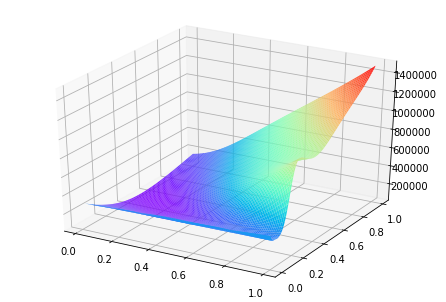

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig)

#3.将X,Ymatch到底面上
X,Y=np.meshgrid(alphas2,betas2)

Z = np.array(sse_two).reshape((99,99))


# Z = np.array(sse_two)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))

Text(0.5, 1.0, "Holt's linear smoothing")

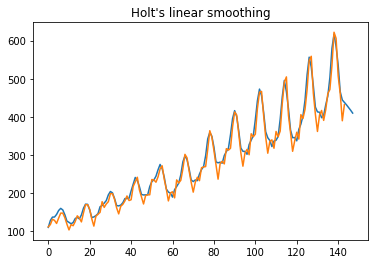

In [15]:
alpha_opt = 0.43
beta_opt = 0.13

holtsmoothed_step2 = holt_2(passenger,alpha_opt,beta_opt)
fig = plt.figure()
plt.plot(holtsmoothed_step2, label = "holt smoothed curve, alpha = 0.09 ,beta = 0.01")
plt.plot(passenger, label="original data")
plt.title("Holt's linear smoothing")

In [19]:
len(holtsmoothed_step2)

148

In [21]:
holtsmoothed_step2[-4:]

[431.8995941485087, 425.0396321783698, 417.79619833410015, 410.1478565379358]